# **Apex Legends K/D Prediction Project**

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt

#Preprocessor
from numpy import median
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Set global scikit-learn configuration
from sklearn import set_config

#Display estimators as a diagram
set_config(display='diagram')

#Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading Data**

In [2]:
joe_df= pd.read_csv("/Users/davyd/OneDrive/Documents/Apex_Data_Joe.csv")
joe_df.info()
joe_df.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               24 non-null     object 
 1   Total Damage         24 non-null     int64  
 2   Total Kills          24 non-null     int64  
 3   Total Deaths         24 non-null     int64  
 4   K/D Ratio            24 non-null     float64
 5   Total wins           24 non-null     int64  
 6   Total Top 5 finish   24 non-null     int64  
 7   Total Games Played   24 non-null     int64  
 8   Highest Kills        24 non-null     int64  
 9   Knockdowns           24 non-null     int64  
 10  Assists              24 non-null     int64  
 11  Teamates Revived     24 non-null     int64  
 12  Allayna Playing      24 non-null     object 
 13  Teammates Respawned  24 non-null     int64  
 14  Win Streak           23 non-null     float64
 15  Ranked Split 1       11 non-null     objec

,Season,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,Assists,Teamates Revived,Allayna Playing,Teammates Respawned,Win Streak,Ranked Split 1,Ranked Split 2,Win rate%
0,5,8332,20,50,0.40,1,12,49,5,21,12,6,no,0,1.0,NaN,NaN,2.04%
1,6,2945,7,16,0.44,0,2,15,2,7,2,0,no,0,0.0,NaN,NaN,0%
2,7,111421,234,543,0.43,19,139,525,5,318,179,68,no,15,2.0,NaN,NaN,3.62%
3,7R,32709,68,169,0.40,6,51,167,4,89,47,24,no,5,2.0,gold 4,silver 4,3.59%
4,8,168498,383,811,0.47,24,200,773,8,522,271,144,no,31,2.0,NaN,NaN,3.10%
5,8R,55867,127,308,0.41,8,72,292,5,182,96,50,no,9,2.0,bronze 1,gold 4,2.74%
6,9,103180,261,404,0.65,21,118,408,7,354,159,101,no,19,2.0,NaN,NaN,5.15%
7,9R,18689,49,66,0.74,9,28,64,4,62,29,17,no,3,2.0,bronze2,gold 4,14.06%
8,10,64975,164,245,0.67,13,68,242,5,210,91,54,no,3,1.0,NaN,NaN,5.37%
9,10R,5910,11,16,0.69,1,4,15,3,12,8,3,no,0,1.0,silver 4,bronze4,6.67%


## **Creating more columns**

In [3]:
# This column is double checking the math of the K/D Ratio to be sure the game is calculating it correctly.
joe_df['Cal K/D'] = joe_df['Total Kills']/joe_df['Total Deaths']

In [4]:
# This column was created to see the percent of games I placed in the top five within the given season.
joe_df['Top 5 %'] = joe_df['Total Top 5 finish']/joe_df['Total Games Played']

In [5]:
# This column was created to see the ratio of kills for the number of 'knocks'. 
joe_df['kill/knock ratio'] = joe_df['Total Kills']/joe_df['Knockdowns']

In [6]:
# This column was created to see an overall average number of 'knocks' per match in a given season.
joe_df['GamesPlayed/knock ratio'] = joe_df['Total Games Played']/joe_df['Knockdowns']

In [7]:
# This column was created to see an overall average number of assists per match in a given season.
joe_df['Average assists per match'] = joe_df['Assists']/joe_df['Total Games Played']

In [8]:
# This column was created to see an overall average number of damage per match in a given season.
joe_df['Average damage per match'] = joe_df['Total Damage']/joe_df['Total Games Played']

In [9]:
# This column was created to see an overall average number of 'knocks' per match in the given season.
joe_df['GamesPlayed/knock ratio'] = joe_df['Knockdowns']/joe_df['Total Games Played']

In [10]:
# Write a filter to put only ranked seasons in a temporary dataframe.
# Then write out an order of the ranks so that predictions can be made.

In [11]:
#example of how to order the rankings
#rankings = {
#    "bronze 1": 1, "bronze 2": 2, "bronze 3": 3, "bronze 4": 4,
#    "silver 1": 5, "silver 2": 6, "silver 3": 7, "silver 4": 8,
#    "gold 1": 9, "gold 2": 10, "gold 3": 11, "gold 4": 12
#}

# Accessing the ranking value for a given rank
#ranking = "silver 3"
#value = rankings.get(ranking)
#print("Ranking value:", value)


# **Same example, but in R**

In [12]:
# Example of how to code in R for the rankings:
#rankings <- c(
#  "bronze 1" = 1, "bronze 2" = 2, "bronze 3" = 3, "bronze 4" = 4,
#  "silver 1" = 5, "silver 2" = 6, "silver 3" = 7, "silver 4" = 8,
#  "gold 1" = 9, "gold 2" = 10, "gold 3" = 11, "gold 4" = 12
#)

# Accessing the ranking value for a given rank
#ranking <- "gold 2"
#value <- rankings[ranking]
#cat("Ranking value:", value, "\n")

In [13]:
# Printing out the new data frame with the added columns
joe_df.describe()

,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,Assists,Teamates Revived,Teammates Respawned,Win Streak,Cal K/D,Top 5 %,kill/knock ratio,GamesPlayed/knock ratio,Average assists per match,Average damage per match
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,180922.250000,389.75000,599.916667,0.593333,25.666667,162.125000,596.416667,6.041667,514.583333,279.708333,138.375000,36.666667,1.521739,0.593106,0.279056,0.769964,0.791535,0.438020,287.760145
std,197285.286066,440.41248,590.783556,0.134639,26.927708,158.756119,598.432875,2.330873,567.830572,315.886397,141.081787,43.187827,0.593109,0.133807,0.053486,0.081335,0.164007,0.124075,61.952748
min,2945.000000,7.00000,16.000000,0.400000,0.000000,2.000000,15.000000,2.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.400000,0.133333,0.689362,0.428571,0.133333,170.040816
25%,53055.250000,97.50000,165.000000,0.462500,7.500000,49.000000,164.250000,4.750000,140.750000,83.750000,44.250000,5.000000,1.000000,0.463567,0.250240,0.721280,0.674221,0.352963,244.163943
50%,99922.500000,177.50000,343.500000,0.595000,15.000000,94.500000,321.500000,5.000000,252.500000,163.500000,76.500000,22.500000,2.000000,0.593652,0.276778,0.746630,0.830551,0.453222,301.154898
75%,253666.250000,557.50000,865.250000,0.675000,38.000000,233.500000,852.250000,7.250000,748.000000,377.000000,212.000000,59.000000,2.000000,0.673916,0.304721,0.786866,0.907713,0.510831,321.649749
max,593401.000000,1320.00000,1763.000000,0.830000,93.000000,556.000000,1778.000000,11.000000,1680.000000,1195.000000,466.000000,173.000000,2.000000,0.830065,0.437500,1.000000,1.019096,0.673619,394.000000


In [14]:
#Saving the new dataframe to upload for other platforms.
joe_df.to_csv('Joe_data_frame', index=False)

In [15]:
# Calculate the average number of kills per season.
avK = joe_df["Total Kills"].mean()

# Convert the average number of kills per season into an integer.
avK_int = int(avK)

# Print the average number of kills in a season.
print("The average number of total kills per season is:", avK_int, "-ouch")

The average number of total kills per season is: 389 -ouch


In [16]:
# Calculating the average damage per season.
avd = joe_df["Total Damage"].mean()

# Convert the average to an integer
avd_int = int(avd)

# Print the average total damage per season
print("The average total damage per season is:", avd_int)

The average total damage per season is: 180922


In [17]:
# Finding the average number of Top 5 finishes per season
av5 = joe_df["Total Top 5 finish"].mean()

# Convert the mean value to an integer
av5_int = int(av5)

# Print the average number of top time finishes per season
print("The average number of toal top 5 finishes per season is:", av5_int)

The average number of toal top 5 finishes per season is: 162


In [18]:
joe_df.head()

,Season,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,...,Win Streak,Ranked Split 1,Ranked Split 2,Win rate%,Cal K/D,Top 5 %,kill/knock ratio,GamesPlayed/knock ratio,Average assists per match,Average damage per match
0,5,8332,20,50,0.40,1,12,49,5,21,...,1.0,NaN,NaN,2.04%,0.400000,0.244898,0.952381,0.428571,0.244898,170.040816
1,6,2945,7,16,0.44,0,2,15,2,7,...,0.0,NaN,NaN,0%,0.437500,0.133333,1.000000,0.466667,0.133333,196.333333
2,7,111421,234,543,0.43,19,139,525,5,318,...,2.0,NaN,NaN,3.62%,0.430939,0.264762,0.735849,0.605714,0.340952,212.230476
3,7R,32709,68,169,0.40,6,51,167,4,89,...,2.0,gold 4,silver 4,3.59%,0.402367,0.305389,0.764045,0.532934,0.281437,195.862275
4,8,168498,383,811,0.47,24,200,773,8,522,...,2.0,NaN,NaN,3.10%,0.472256,0.258732,0.733716,0.675291,0.350582,217.979301


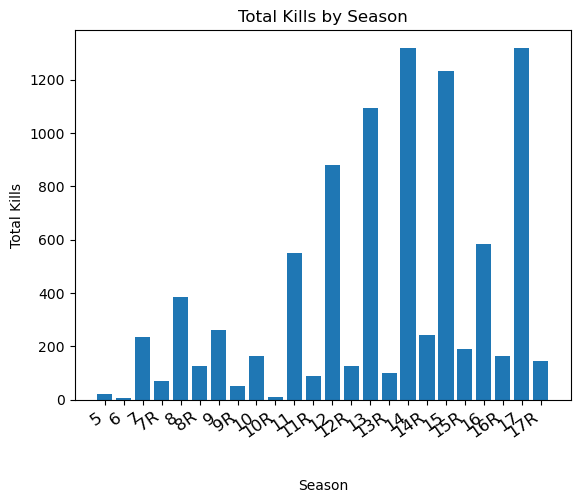

In [19]:
plt.bar(joe_df['Season'], joe_df['Total Kills'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Total Kills')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Total Kills by Season')

# Show the plot
plt.show()

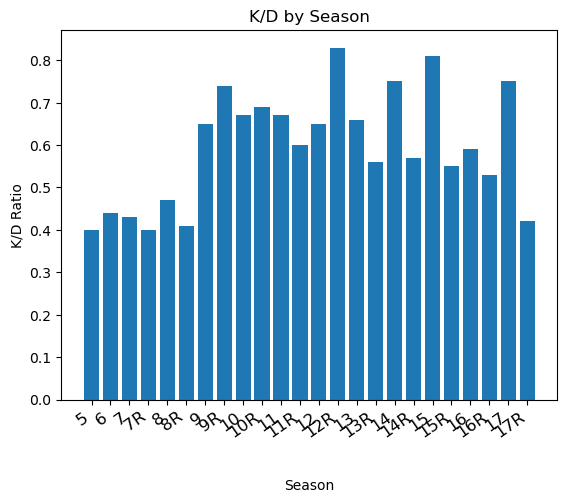

In [20]:
plt.bar(joe_df['Season'], joe_df['K/D Ratio'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('K/D Ratio')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('K/D by Season')

# Show the plot
plt.show()

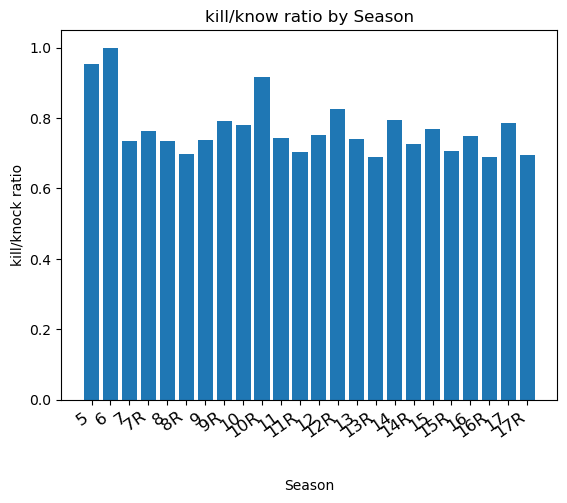

In [21]:
plt.bar(joe_df['Season'], joe_df['kill/knock ratio'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('kill/knock ratio')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('kill/know ratio by Season')

# Show the plot
plt.show()

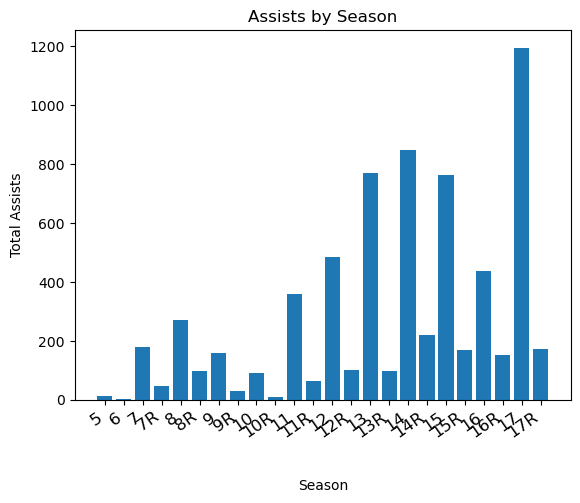

In [22]:
plt.bar(joe_df['Season'], joe_df['Assists'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Total Assists')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Assists by Season')

# Show the plot
plt.show()

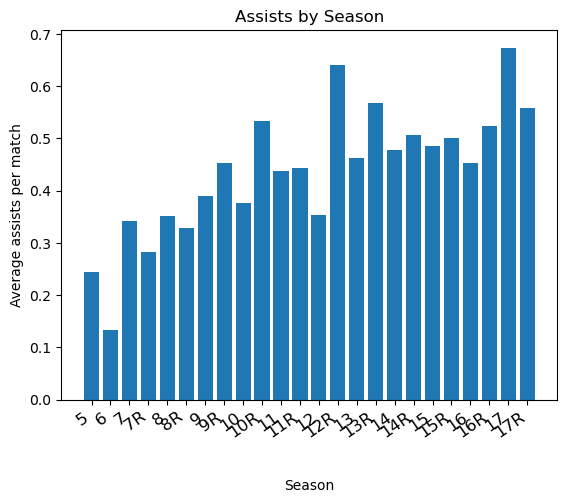

In [23]:
plt.bar(joe_df['Season'], joe_df['Average assists per match'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Average assists per match')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Assists by Season')

# Show the plot
plt.show()

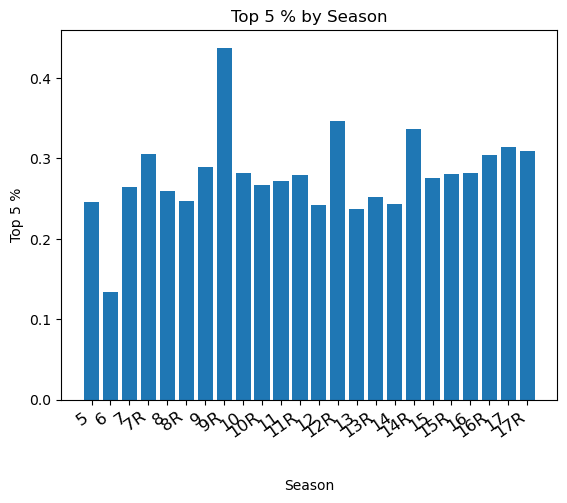

In [24]:
plt.bar(joe_df['Season'], joe_df['Top 5 %'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Top 5 %')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Top 5 % by Season')

# Show the plot
plt.show()

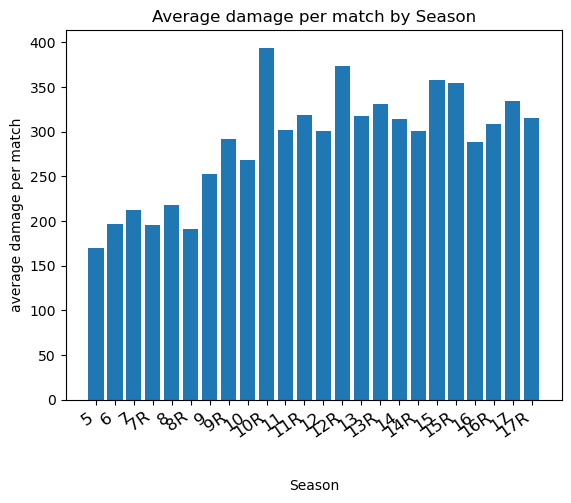

In [25]:
plt.bar(joe_df['Season'], joe_df['Average damage per match'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('average damage per match')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Average damage per match by Season')

# Show the plot
plt.show()

## **Modeling**

In [26]:
# Create a DataFrame
joe_df = pd.DataFrame(joe_df)

In [27]:
# Identify rows with "r" in any column
rows_to_drop = joe_df.apply(lambda row: any(row.astype(str).str.contains('r')), axis=1)

In [31]:
# Drop specified rows and columns
df_cleaned = joe_df[~rows_to_drop]

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned)


Cleaned DataFrame:
   Season  Total Damage  Total Kills  Total Deaths  K/D Ratio  Total wins  \
0       5          8332           20            50       0.40           1   
1       6          2945            7            16       0.44           0   
2       7        111421          234           543       0.43          19   
4       8        168498          383           811       0.47          24   
6       9        103180          261           404       0.65          21   
8      10         64975          164           245       0.67          13   
10     11        245509          549           825       0.67          37   
12     12        411927          879          1357       0.65          52   
14     13        527042         1093          1660       0.66          58   
16     14        558027         1320          1763       0.75          73   
17    14R        130063          241           424       0.57          24   
18     15        561126         1232          1528      

In [ ]:
# Columns to eliminate (these columns have nothing to do with making predictions)
columns_to_eliminate = ['Allayna Playing', 'Ranked Split 1', 'Ranked Split 2', 'Win Streak']

In [ ]:
# Drop specified columns
df_cleaned = df_cleaned.drop(columns=columns_to_eliminate)
# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned)